# Placement Prediction 

### The Placement Prediction project leverages machine learning to analyze student data and predict their chances of securing a job. It considers factors like academic performance, skills, and extracurricular activities to generate insights. This helps students and institutions make informed career decisions.

## 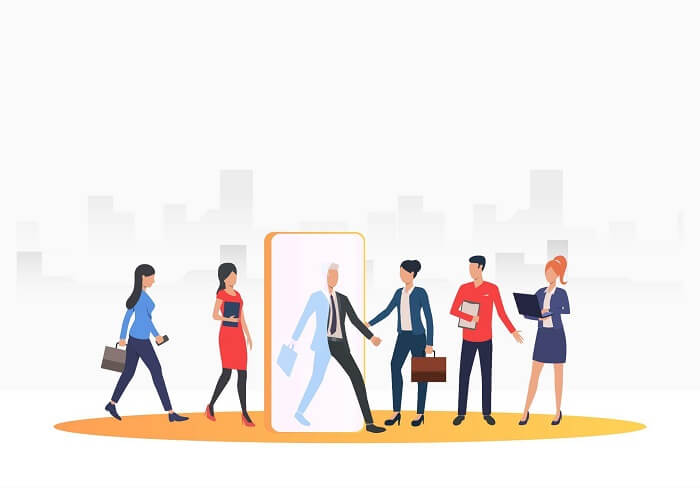

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('placementdata.csv')
df

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                    65               4.4                        No   
1                    90               4.0                       Yes   
2                    82               4.8                       Yes   
3                    85               4.4                       Yes   
4                    86               4.5                       Yes   
...                 ...               ...                       ...   
9995                 72               3.9                       Yes   
9996                 90               4.8                        No   
9997                 70               4.8                       Yes   
9998                 87               4.8                       Yes   
9999                 66               3.8                        No   

     PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                   No         61         79       NotPlaced  
1                  Yes         78         82          Placed  
2                   No         79         80       NotPlaced  
3                  Yes         81         80          Placed  
4                  Yes         74         88          Placed  
...                ...        ...        ...             ...  
9995                No         85         66       NotPlaced  
9996                No         84         67          Placed  
9997               Yes         79         81          Placed  
9998               Yes         71         85          Placed  
9999                No         62         66       NotPlaced  

[10000 rows x 12 columns]

### CGPA - It is the overall grades achieved by the student.
### Internships - It tells the number of internships a student has done.
### Projects - Number of projects a student has done.
### Workshops/Certifications - As there are multiple courses available online student opt for them to upskill themselves.
### ApptitudeTestScore - Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.
### SoftSkillrating - Communication is a key role that plays in the placement or in any aspect of the life.
### ExtraCurricularActivities - This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.
### PlacementTraining - It is provided to students in college to ace the placement process.
### SSC and HSC - Senior Secondary and Higher Secondary Marks.
### PlacementStatus - This is our target column with two classes placed and not placed.

## Basic Checks 

In [3]:
df.shape

(10000, 12)

## There are 10000 rows and 12 columns 

In [4]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

### These are the columns 

In [5]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82          Placed  
2                No         79         80       NotPlaced  
3               Yes         81         80          Placed  
4               Yes         74         88          Placed

## The first 5 rows 

In [6]:
df.tail()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
9995                 72               3.9                       Yes   
9996                 90               4.8                        No   
9997                 70               4.8                       Yes   
9998                 87               4.8                       Yes   
9999                 66               3.8                        No   

     PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
9995                No         85         66       NotPlaced  
9996                No         84         67          Placed  
9997               Yes         79         81          Placed  
9998               Yes         71         85          Placed  
9999                No         62         66       NotPlaced

### The last 5 rows 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [8]:
df.describe()

StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73.000000          4.000000   
50%                    1.000000          80.000000          4.400000   
75%                    2.000000          87.000000          4.700000   
max                    3.000000          90.000000          4.800000   

          SSC_Marks     HSC_Marks  
count  10000.000000  10000.000000  
mean      69.159400     74.501500  
std       10.430459      8.919527  
min       55.000000     57.000000  
25%       59.000000     67.000000  
50%       70.000000     73.000000  
75%       78.000000     83.000000  
max       90.000000     88.000000

In [9]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

## There are no null values 

In [10]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'SSC_Marks', 'HSC_Marks'],
      dtype='object')


In [11]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')


### There are 3 categorical columns 

In [12]:
for i in cat_data.drop("PlacementStatus",axis=1):
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("**********************")

ExtracurricularActivities ['No' 'Yes']
ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64
**********************
PlacementTraining ['No' 'Yes']
PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64
**********************


## EDA 

In [13]:
import pandas as pd
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

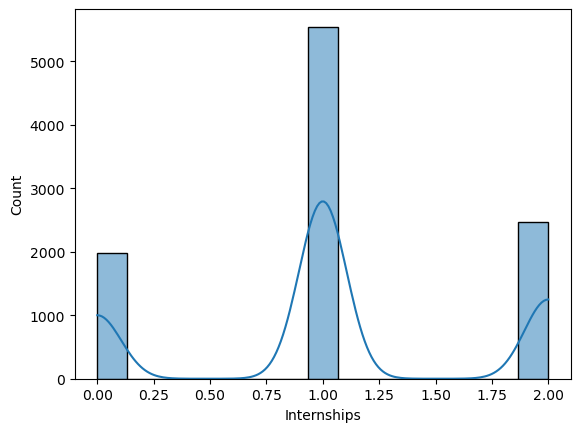

In [14]:
sns.histplot(x=df['Internships'],kde=True)
plt.show()

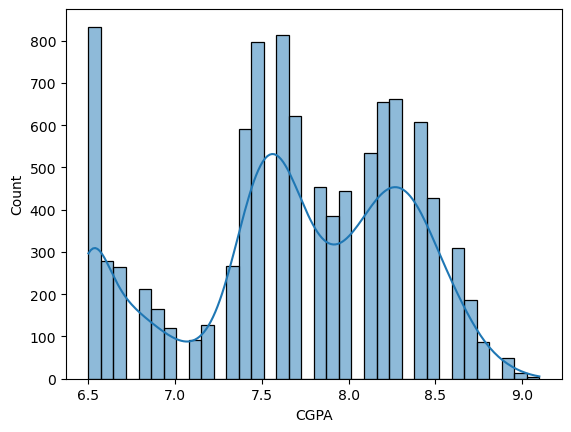

In [15]:
sns.histplot(x=df['CGPA'],kde=True)
plt.show()

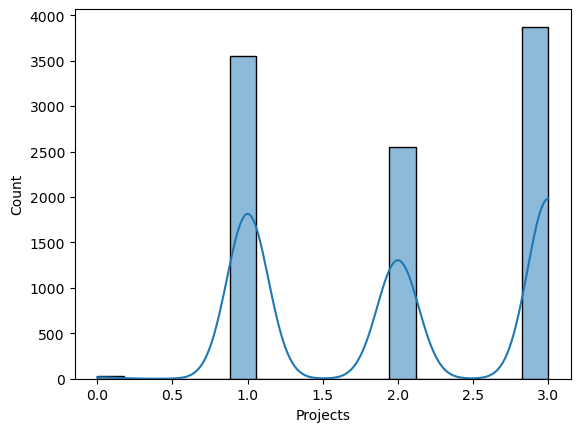

In [16]:
sns.histplot(x=df['Projects'],kde=True)
plt.show()

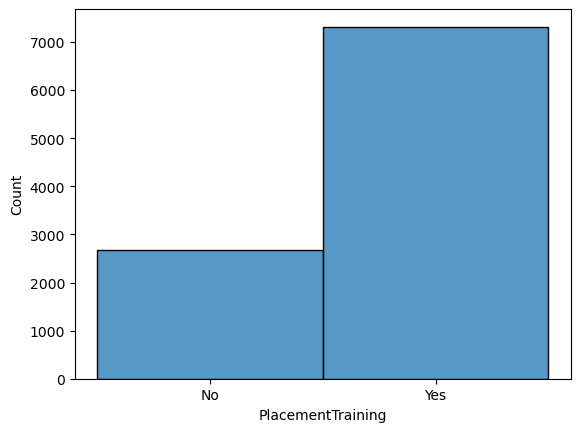

In [17]:
sns.histplot(x=df['PlacementTraining'])
plt.show()

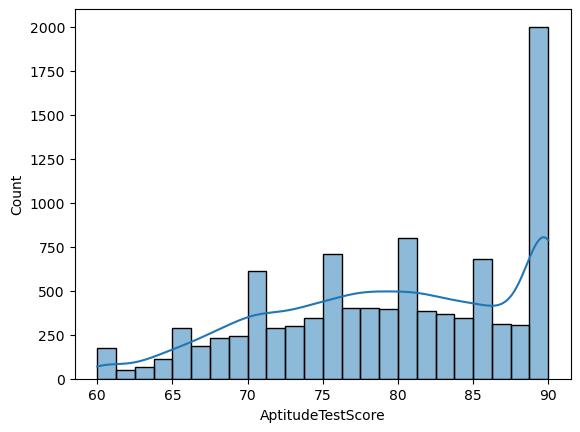

In [18]:
sns.histplot(x=df['AptitudeTestScore'],kde=True)
plt.show()

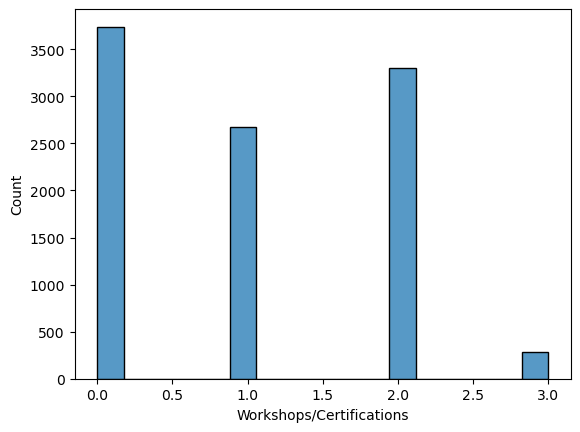

In [19]:
sns.histplot(x=df['Workshops/Certifications'])
plt.show()

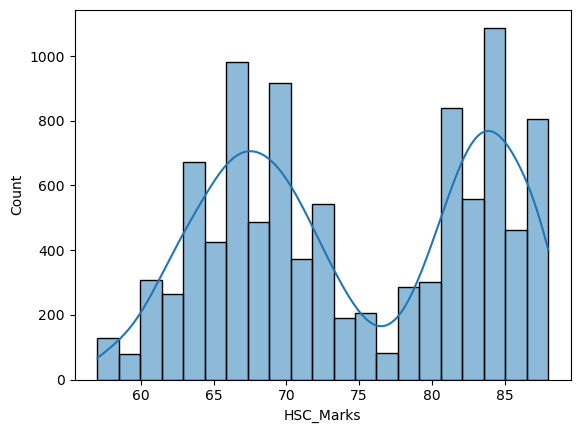

In [20]:
sns.histplot(x=df['HSC_Marks'],kde=True)
plt.show()

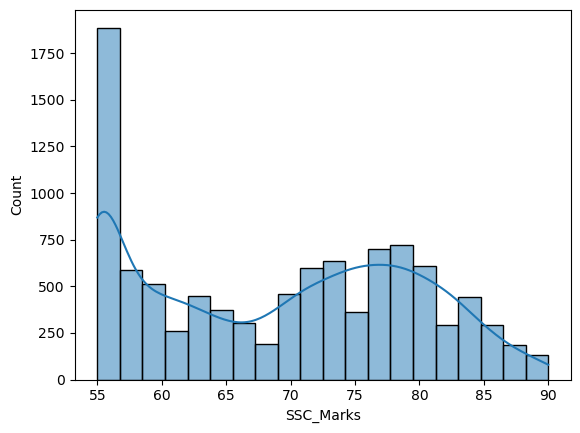

In [21]:
sns.histplot(x=df['SSC_Marks'],kde=True)
plt.show()

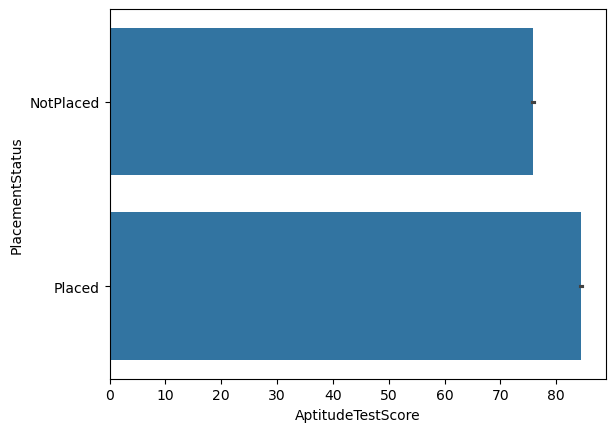

In [22]:
sns.barplot(x=df['AptitudeTestScore'],y=df['PlacementStatus'])
plt.show()

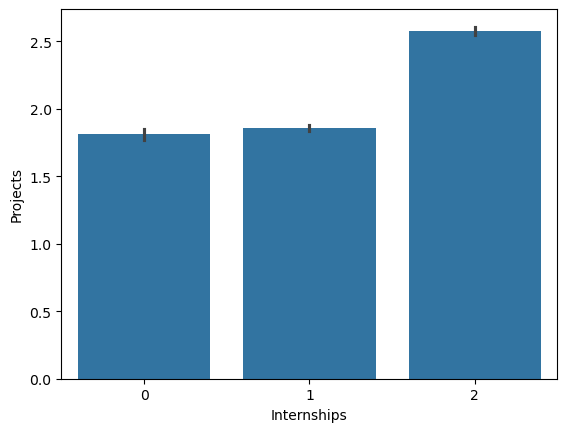

In [23]:
sns.barplot(x=df['Internships'],y=df['Projects'])
plt.show()

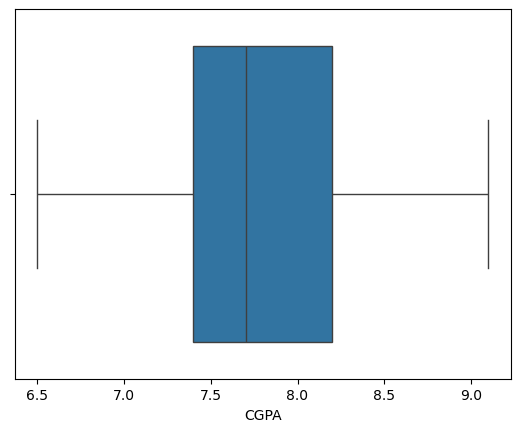

In [24]:
sns.boxplot(x=df['CGPA'])
plt.show()

## There are no outliers in the CGPA column

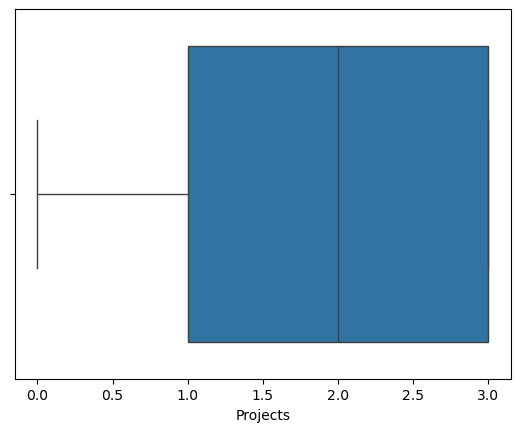

In [25]:
sns.boxplot(x=df['Projects'])
plt.show()

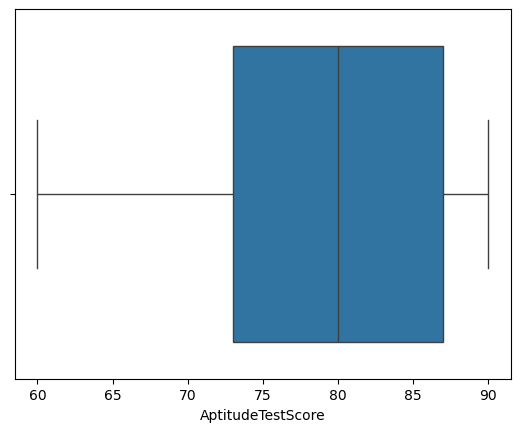

In [26]:
sns.boxplot(x=df['AptitudeTestScore'])
plt.show()

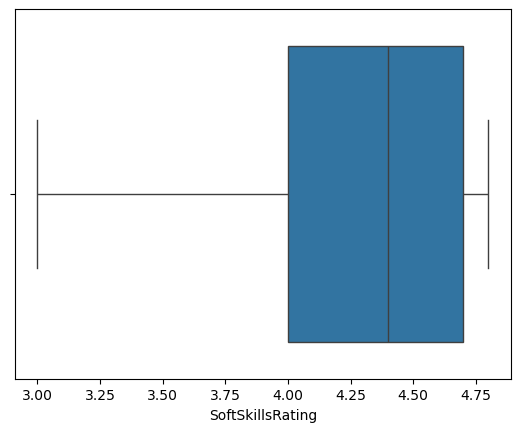

In [27]:
sns.boxplot(x=df['SoftSkillsRating'])
plt.show()

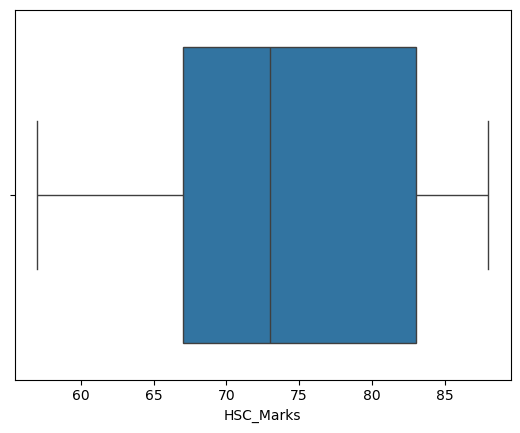

In [28]:
sns.boxplot(x=df['HSC_Marks'])
plt.show()

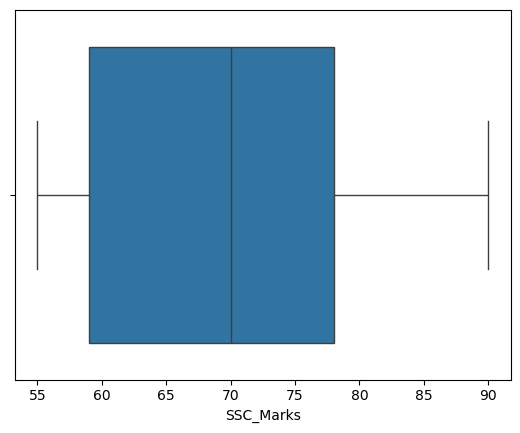

In [29]:
sns.boxplot(x=df['SSC_Marks'])
plt.show()

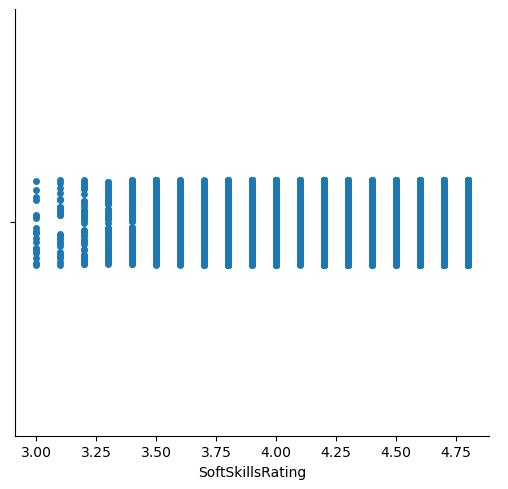

In [30]:
sns.catplot(x=df['SoftSkillsRating'])
plt.show()

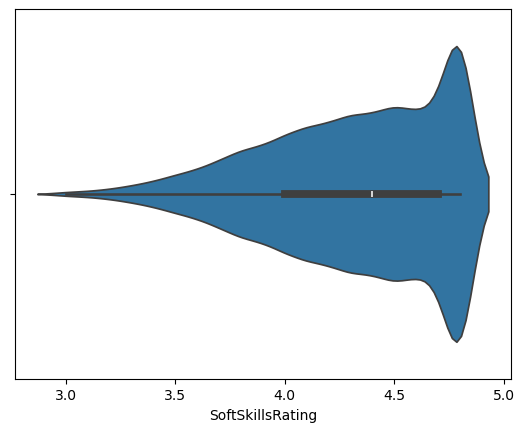

In [31]:
sns.violinplot(x=df['SoftSkillsRating'])
plt.show()

In [32]:
from mpl_toolkits.mplot3d import axes3d

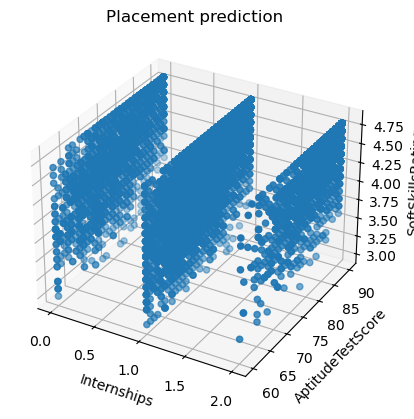

In [33]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.scatter(df['Internships'],df['AptitudeTestScore'],df['SoftSkillsRating'])
ax.set_xlabel('Internships')
ax.set_ylabel('AptitudeTestScore')
ax.set_zlabel('SoftSkillsRating')
ax.set_title('Placement prediction')
plt.show()

## Bivariate Analysis 

In [34]:
d1=df[['ExtracurricularActivities', 'PlacementTraining']]

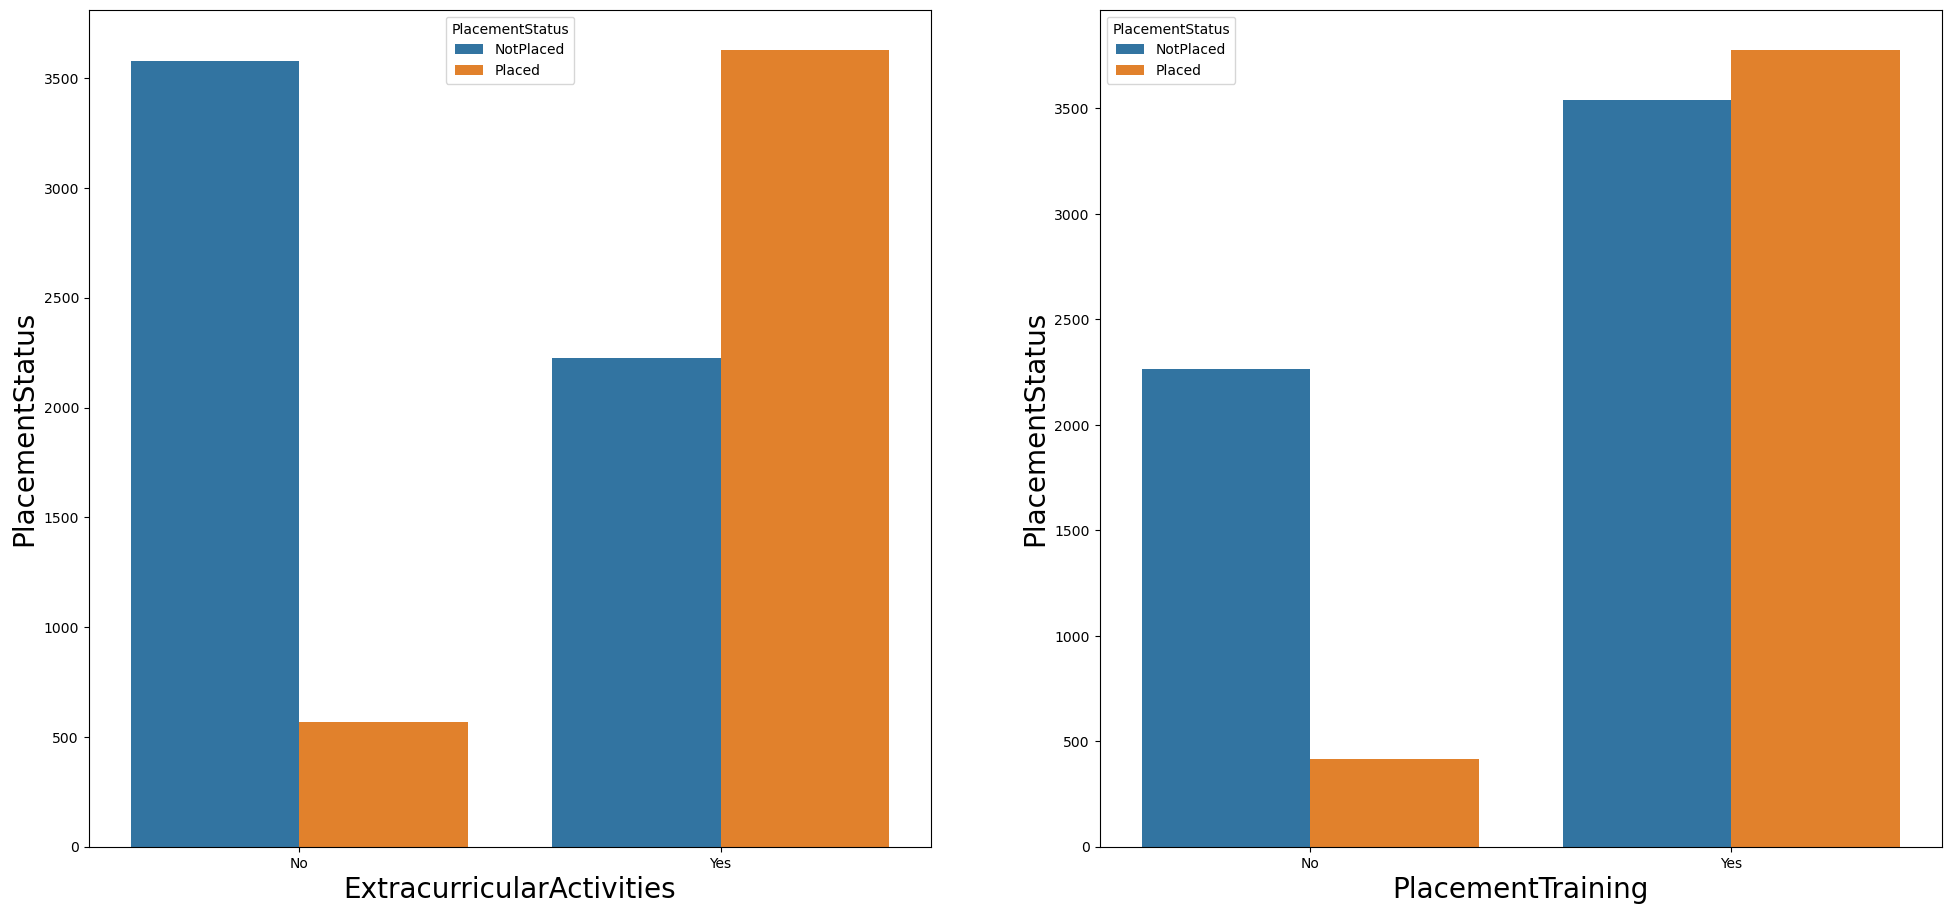

In [35]:

plt.figure(figsize=(50,50), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d1[column]         
                        ,hue=df.PlacementStatus)
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('PlacementStatus',fontsize=20)
    plotnumber+=1
plt.show()

In [36]:
d2=df[['CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'SSC_Marks', 'HSC_Marks']]

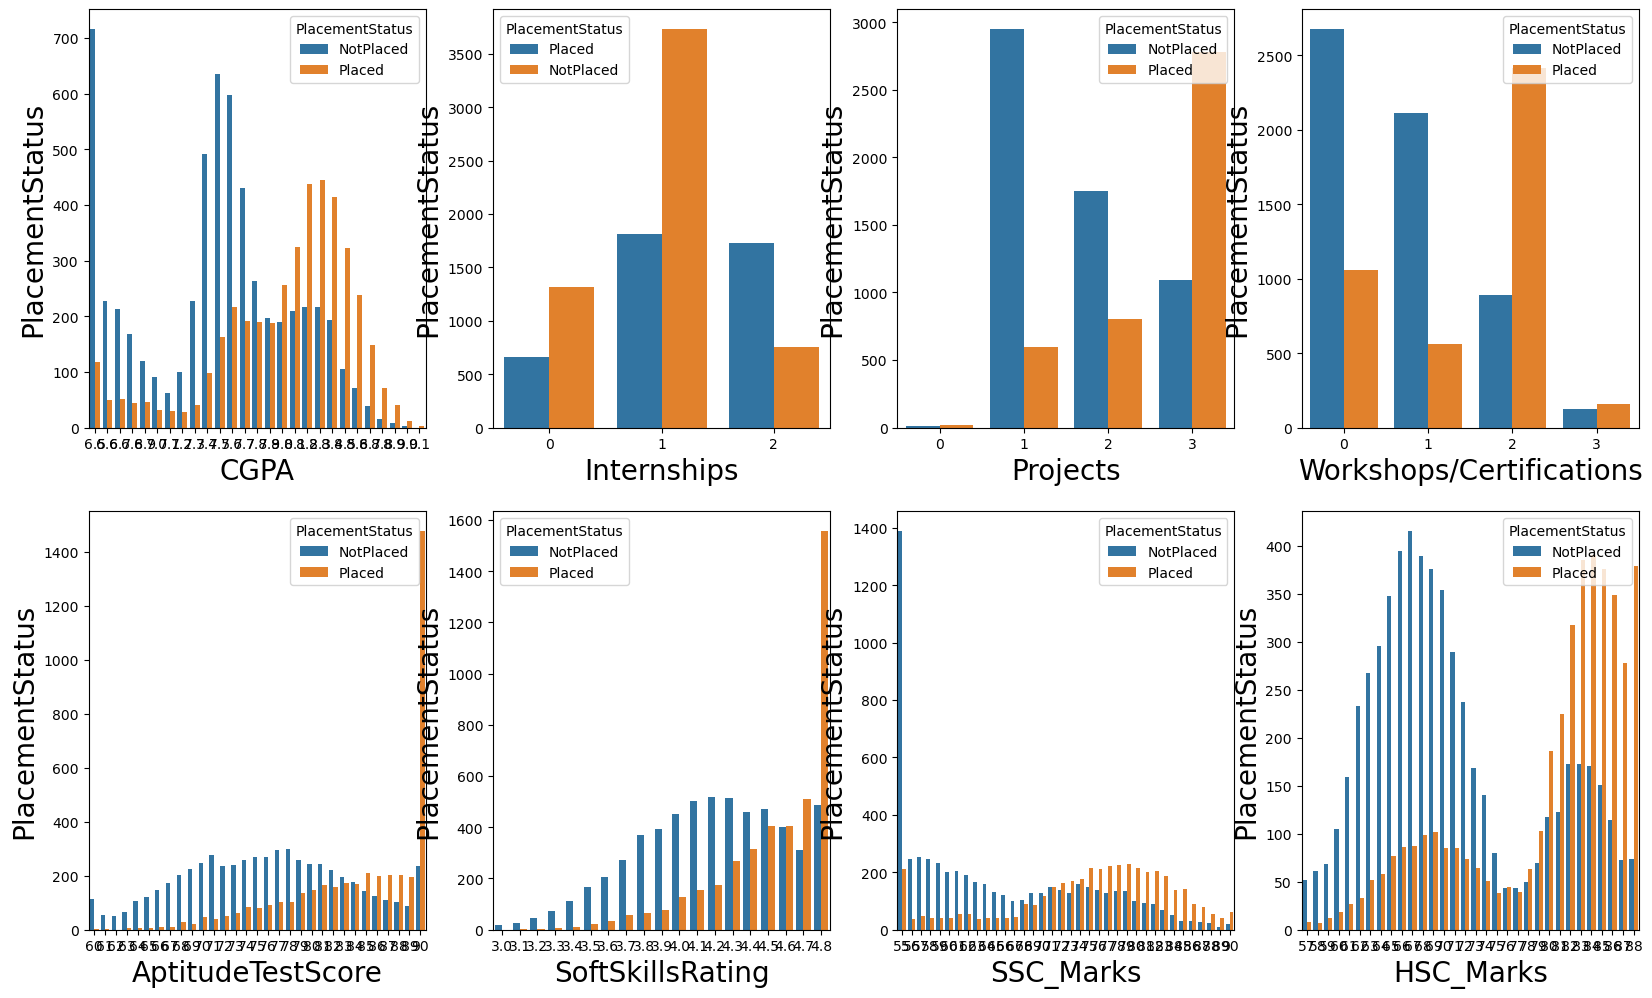

In [37]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d2[column]
                        ,hue=df.PlacementStatus)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PlacementStatus',fontsize=20)
    plotnumber+=1
plt.show()

## Multivariate Analysis 

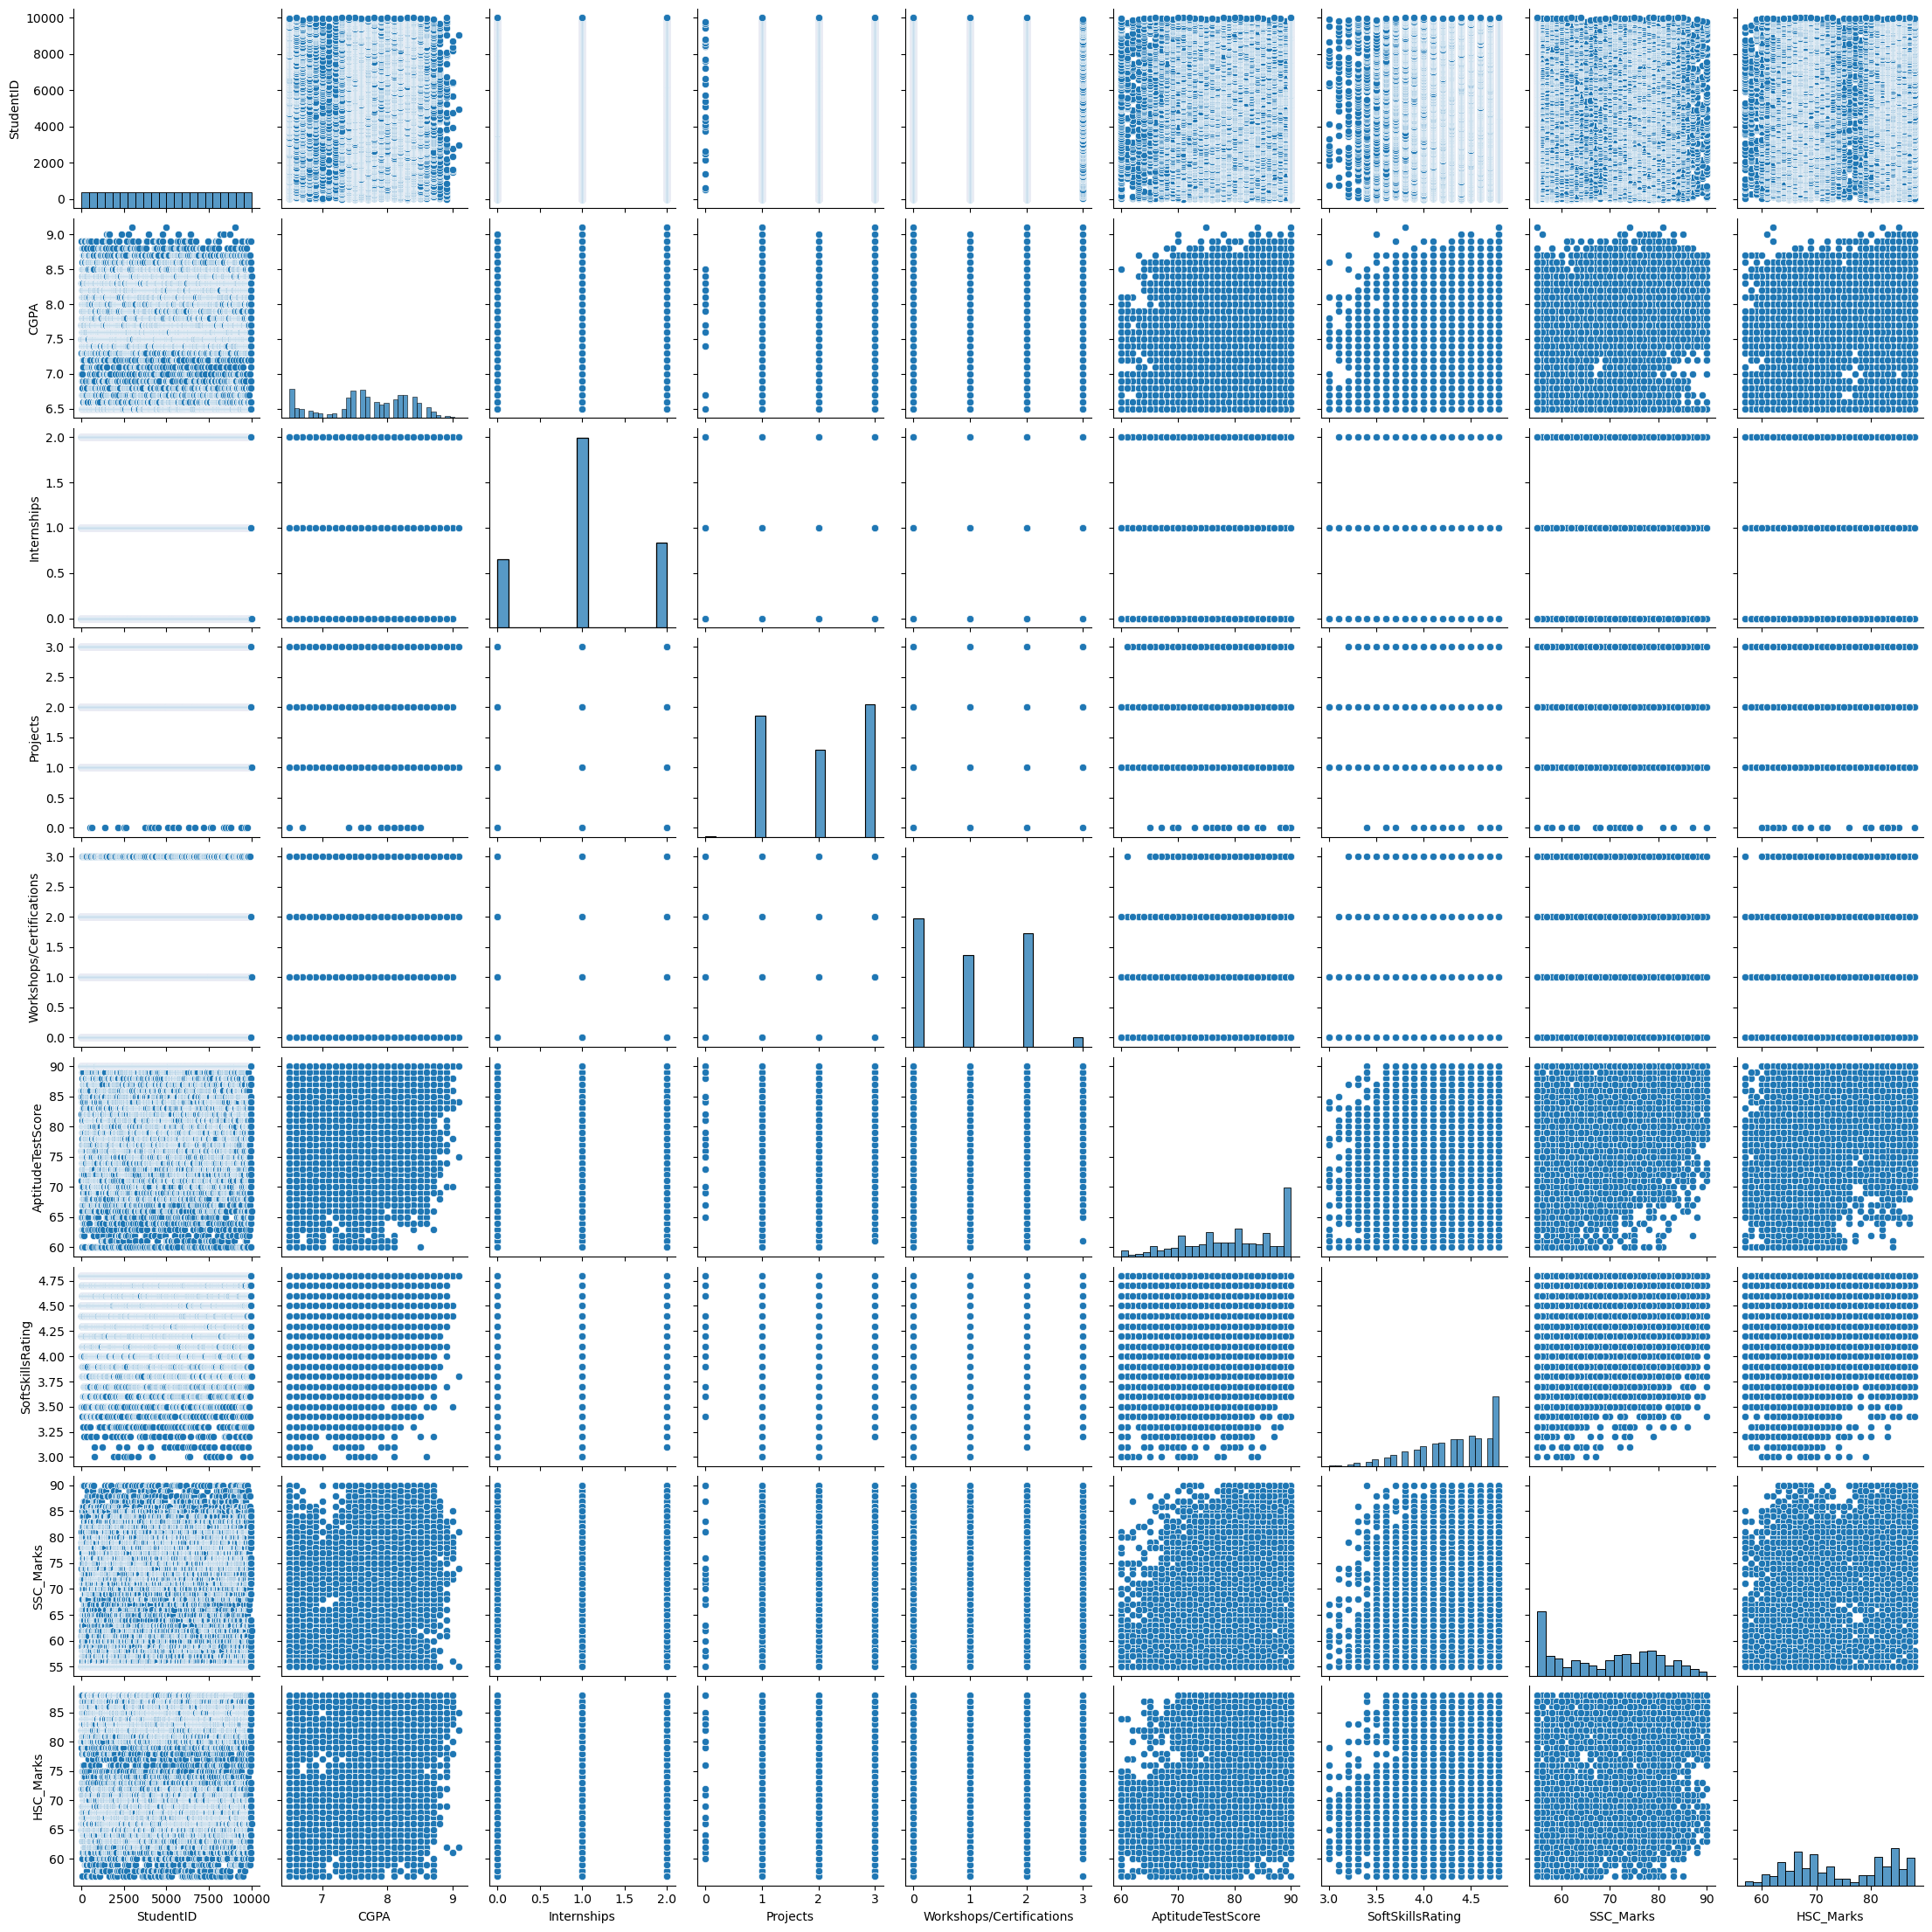

In [38]:
sns.pairplot(df)
plt.show()

## Encoding (Converting categorical data to numerical data)

In [39]:
df

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                    65               4.4                        No   
1                    90               4.0                       Yes   
2                    82               4.8                       Yes   
3                    85               4.4                       Yes   
4                    86               4.5                       Yes   
...                 ...               ...                       ...   
9995                 72               3.9                       Yes   
9996                 90               4.8                        No   
9997                 70               4.8                       Yes   
9998                 87               4.8                       Yes   
9999                 66               3.8                        No   

     PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                   No         61         79       NotPlaced  
1                  Yes         78         82          Placed  
2                   No         79         80       NotPlaced  
3                  Yes         81         80          Placed  
4                  Yes         74         88          Placed  
...                ...        ...        ...             ...  
9995                No         85         66       NotPlaced  
9996                No         84         67          Placed  
9997               Yes         79         81          Placed  
9998               Yes         71         85          Placed  
9999                No         62         66       NotPlaced  

[10000 rows x 12 columns]

In [40]:
## Encoding Extracurricular activities 

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.ExtracurricularActivities=label.fit_transform(df.ExtracurricularActivities)

In [41]:
## Encoding PlacementTraining

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.PlacementTraining=label.fit_transform(df.PlacementTraining)

In [42]:
## Encoding PlacementStatus

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.PlacementStatus=label.fit_transform(df.PlacementStatus)

In [43]:
df

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                    65               4.4                          0   
1                    90               4.0                          1   
2                    82               4.8                          1   
3                    85               4.4                          1   
4                    86               4.5                          1   
...                 ...               ...                        ...   
9995                 72               3.9                          1   
9996                 90               4.8                          0   
9997                 70               4.8                          1   
9998                 87               4.8                          1   
9999                 66               3.8                          0   

      PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                     0         61         79                0  
1                     1         78         82                1  
2                     0         79         80                0  
3                     1         81         80                1  
4                     1         74         88                1  
...                 ...        ...        ...              ...  
9995                  0         85         66                0  
9996                  0         84         67                1  
9997                  1         79         81                1  
9998                  1         71         85                1  
9999                  0         62         66                0  

[10000 rows x 12 columns]

## Feature Selection 

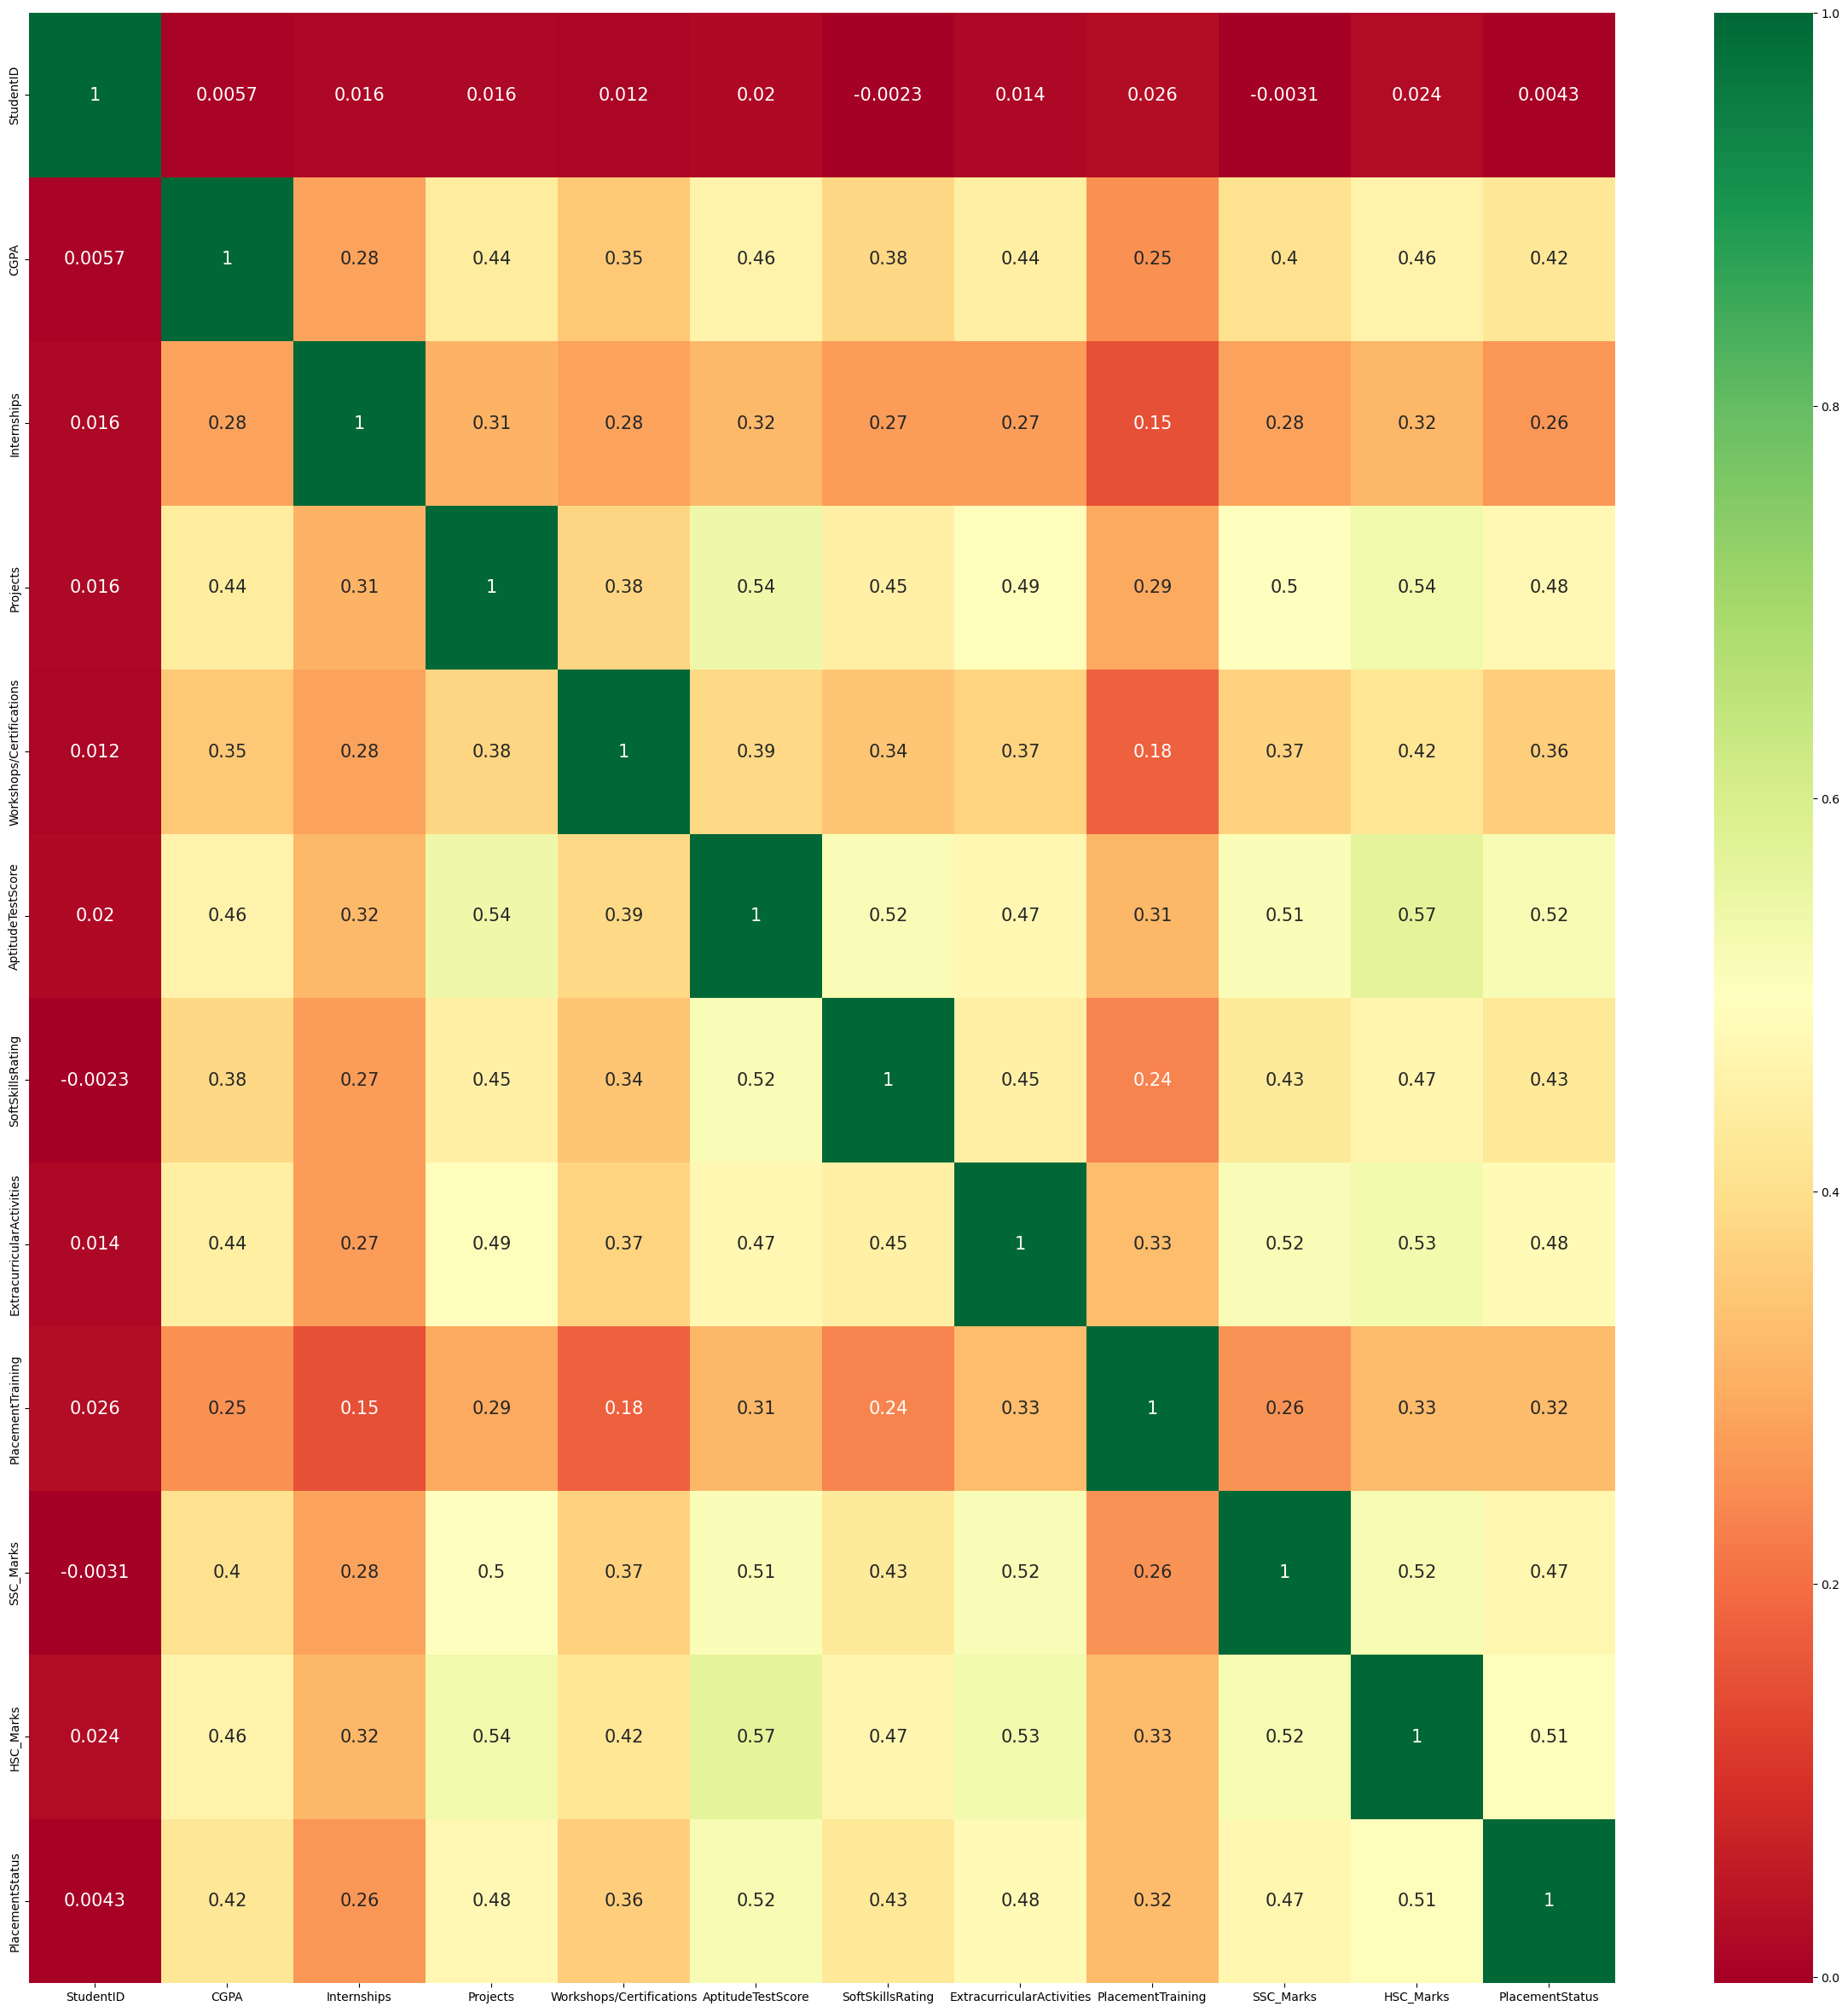

In [44]:

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

## Dropping unnecessary columns 

In [45]:
df

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                    65               4.4                          0   
1                    90               4.0                          1   
2                    82               4.8                          1   
3                    85               4.4                          1   
4                    86               4.5                          1   
...                 ...               ...                        ...   
9995                 72               3.9                          1   
9996                 90               4.8                          0   
9997                 70               4.8                          1   
9998                 87               4.8                          1   
9999                 66               3.8                          0   

      PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                     0         61         79                0  
1                     1         78         82                1  
2                     0         79         80                0  
3                     1         81         80                1  
4                     1         74         88                1  
...                 ...        ...        ...              ...  
9995                  0         85         66                0  
9996                  0         84         67                1  
9997                  1         79         81                1  
9998                  1         71         85                1  
9999                  0         62         66                0  

[10000 rows x 12 columns]

In [46]:
df.drop(['StudentID','ExtracurricularActivities','SSC_Marks','HSC_Marks'], axis="columns", inplace=True)

In [47]:
df

CGPA  Internships  Projects  Workshops/Certifications  \
0      7.5            1         1                         1   
1      8.9            0         3                         2   
2      7.3            1         2                         2   
3      7.5            1         1                         2   
4      8.3            1         2                         2   
...    ...          ...       ...                       ...   
9995   7.5            1         1                         2   
9996   7.4            0         1                         0   
9997   8.4            1         3                         0   
9998   8.9            0         3                         2   
9999   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating  PlacementTraining  PlacementStatus  
0                    65               4.4                  0                0  
1                    90               4.0                  1                1  
2                    82               4.8                  0                0  
3                    85               4.4                  1                1  
4                    86               4.5                  1                1  
...                 ...               ...                ...              ...  
9995                 72               3.9                  0                0  
9996                 90               4.8                  0                1  
9997                 70               4.8                  1                1  
9998                 87               4.8                  1                1  
9999                 66               3.8                  0                0  

[10000 rows x 8 columns]

## Model Creation 

In [48]:
## Split the data into x and y 
x = df.drop('PlacementStatus', axis=1)
y = df.PlacementStatus

In [49]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [50]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [51]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0: 4631, 1: 3369})
after smote Counter({1: 4631, 0: 4631})


In [52]:
x_test

CGPA  Internships  Projects  Workshops/Certifications  \
6252   7.6            0         1                         0   
4684   7.5            1         1                         0   
1731   6.6            1         1                         1   
4742   8.5            1         3                         2   
4521   8.2            1         0                         2   
...    ...          ...       ...                       ...   
6412   7.5            1         1                         0   
8285   6.5            1         2                         0   
7853   8.4            1         3                         2   
1095   8.4            1         3                         3   
6929   6.7            1         1                         1   

      AptitudeTestScore  SoftSkillsRating  PlacementTraining  
6252                 80               3.9                  0  
4684                 81               3.8                  1  
1731                 60               4.0                  0  
4742                 90               4.8                  1  
4521                 90               4.7                  1  
...                 ...               ...                ...  
6412                 67               3.8                  0  
8285                 81               4.1                  0  
7853                 90               4.8                  1  
1095                 90               4.7                  1  
6929                 63               4.6                  0  

[2000 rows x 7 columns]

In [53]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    1
       ..
6412    0
8285    0
7853    1
1095    1
6929    0
Name: PlacementStatus, Length: 2000, dtype: int32

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_smote, y_smote)

logistic_regression_pred = logistic_regression_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, logistic_regression_pred)
print("Precision:", precision)

recall = recall_score(y_test, logistic_regression_pred)
print("Recall:", recall)

f1 = f1_score(y_test, logistic_regression_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[900 272]
 [171 657]]
Accuracy: 0.7785
Precision: 0.7072120559741658
Recall: 0.7934782608695652
F1 Score: 0.7478656801365965


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

svc_model = SVC()
svc_model.fit(x_smote, y_smote)

svc_pred = svc_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svc_pred)
print("Precision:", precision)

recall = recall_score(y_test, svc_pred)
print("Recall:", recall)

f1 = f1_score(y_test, svc_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[931 241]
 [221 607]]
Accuracy: 0.769
Precision: 0.7158018867924528
Recall: 0.7330917874396136
F1 Score: 0.7243436754176611


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_smote, y_smote)

random_forest_pred = random_forest_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, random_forest_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, random_forest_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, random_forest_pred)
print("Precision:", precision)

recall = recall_score(y_test, random_forest_pred)
print("Recall:", recall)

f1 = f1_score(y_test, random_forest_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[936 236]
 [256 572]]
Accuracy: 0.754
Precision: 0.7079207920792079
Recall: 0.6908212560386473
F1 Score: 0.6992665036674817


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_smote, y_smote)

gradient_boosting_pred = gradient_boosting_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, gradient_boosting_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gradient_boosting_pred)
print("Precision:", precision)

recall = recall_score(y_test, gradient_boosting_pred)
print("Recall:", recall)

f1 = f1_score(y_test, gradient_boosting_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[939 233]
 [200 628]]
Accuracy: 0.7835
Precision: 0.7293844367015099
Recall: 0.7584541062801933
F1 Score: 0.7436352871521611


In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [59]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([1, 0, 1, ..., 0, 0, 1])

In [60]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)


0.985

In [61]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.711

### HyperParameter Tuning 

In [62]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [63]:

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 16, 'min_samples_split': 2, 'splitter': 'random'})


In [64]:
tree_cv.best_score_

0.7812573256953081

In [65]:
model=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf= 1,min_samples_split=3,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values 

array([0, 0, 0, ..., 1, 1, 0])

In [66]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance 
y_train_predict

array([1, 0, 1, ..., 1, 1, 1])

In [67]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.727

In [68]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.753